# Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Obective
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
## read / load the data
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Loan.csv")

##creating a copy of the data
df = data.copy()

In [6]:
df.head() # displays first 5 rows of our dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Breif info about the columns

In [7]:
df.shape   ##checking the shape of the data

(5000, 14)

In [8]:
df.describe() # getting the statistical summary of all the numerical data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Observations :
The average age of customers is 45 years, with an average of 20 years of work experience, ranging from 23 to 67 years. The average income is approximately 73,774, though there is considerable variability, with a range from -$3.00 to $224,000. The average family size is around 2.4 members, indicating that most households are small to medium-sized. About 29.4% of customers have credit cards, while only 10.44% have personal loans. Engagement with investment products is low, with 6.04% holding securities accounts and 10.44% owning CDs. Around 59.68% of respondents use online banking services. The average education level suggests that many individuals have at least some higher education. The income distribution is right-skewed, with the majority earning below the mean, as indicated by a large standard deviation. The average mortgage amount is $56,498, reflecting diverse housing situations among the customers..

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Brief information about the columns in dataset

ID: Customer ID Age: Customer’s age in completed years
Experience: # years of professional experience
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code. Family: The family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have a securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use Internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?

In [10]:
df.isnull().sum()  ## checking for null values in dataset

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [11]:
df.duplicated().sum()  ## checking for duplicate values in dataset

0

#### Finding relations between features and survival

we analyze relationship between different features with respect to Personal loan. We see how different feature values show different chance on opting for a personal loan. We also plot different kinds of diagrams to visualize our data and findings.

In [12]:
# analysing how many have already opted for loan
personal_loan = df[df['Personal_Loan'] == 1]
no_personal_loan = df[df['Personal_Loan'] == 0]

# Printing the number and percentage of people who took a personal loan
print("People who have taken Personal Loan: %d (%.1f%%)" % (len(personal_loan), float(len(personal_loan)) / len(df) * 100.0))

# Printing the number and percentage of people who have not taken a personal loan
print("People who have not taken Personal Loan: %d (%.1f%%)" % (len(no_personal_loan), float(len(no_personal_loan)) / len(df) * 100.0))

People who have taken Personal Loan: 480 (9.6%)
People who have not taken Personal Loan: 4520 (90.4%)


                  Age                                                      \
                count       mean        std   min   25%   50%   75%   max   
Personal_Loan                                                               
0              4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0  67.0   
1               480.0  45.066667  11.590964  26.0  35.0  45.0  55.0  65.0   

              Experience                                                     
                   count       mean        std  min   25%   50%   75%   max  
Personal_Loan                                                                
0                 4520.0  20.132301  11.456672 -3.0  10.0  20.0  30.0  43.0  
1                  480.0  19.843750  11.582443  0.0   9.0  20.0  30.0  41.0  


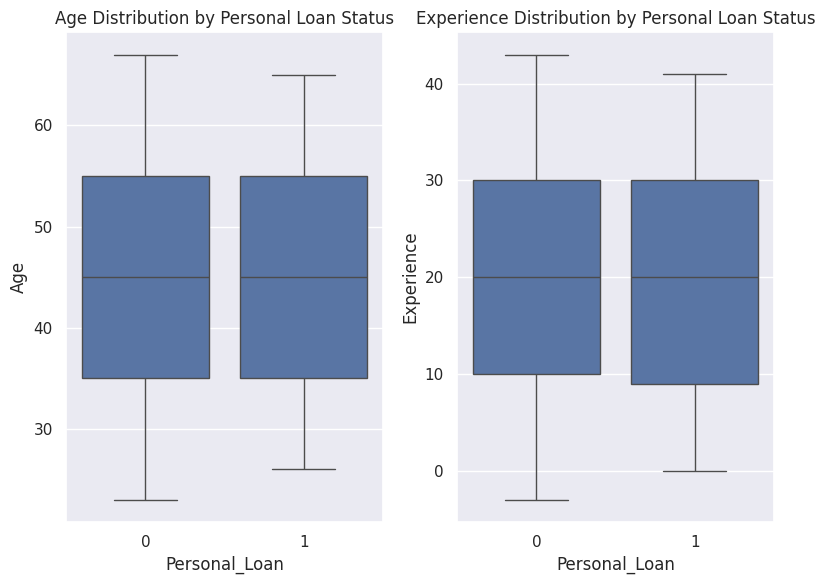

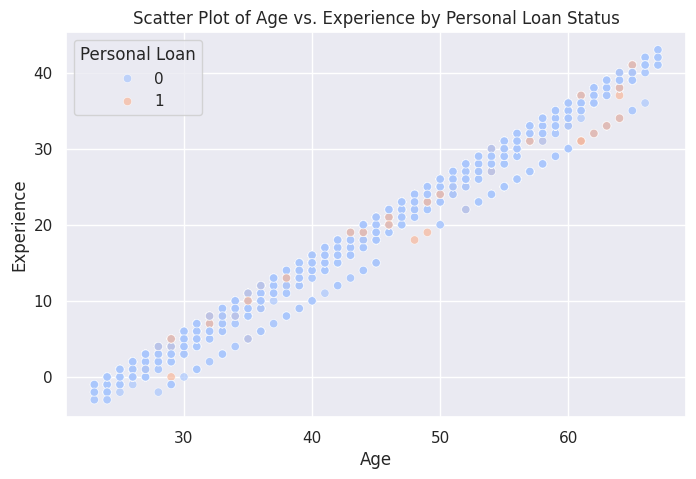

In [13]:
#Age and experience against Personal loan

# Basic Descriptive Statistics (mean, std, min, max)
print(df.groupby('Personal_Loan')[['Age', 'Experience']].describe())

# Visualize Age and Experience distributions against Personal Loan
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Age distribution (by Personal Loan status)
sns.boxplot(x='Personal_Loan', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Personal Loan Status')

# Experience distribution (by Personal Loan status)
sns.boxplot(x='Personal_Loan', y='Experience', data=df, ax=axes[1])
axes[1].set_title('Experience Distribution by Personal Loan Status')

plt.tight_layout()

# Additional scatter plot to show the relationship between Age and Experience against Personal Loan status
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Experience', hue='Personal_Loan', data=df, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Age vs. Experience by Personal Loan Status')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend(title='Personal Loan', loc='upper left')

We can see that age and experience share almost same relationship and age can be dropped to avoid multicolinearity

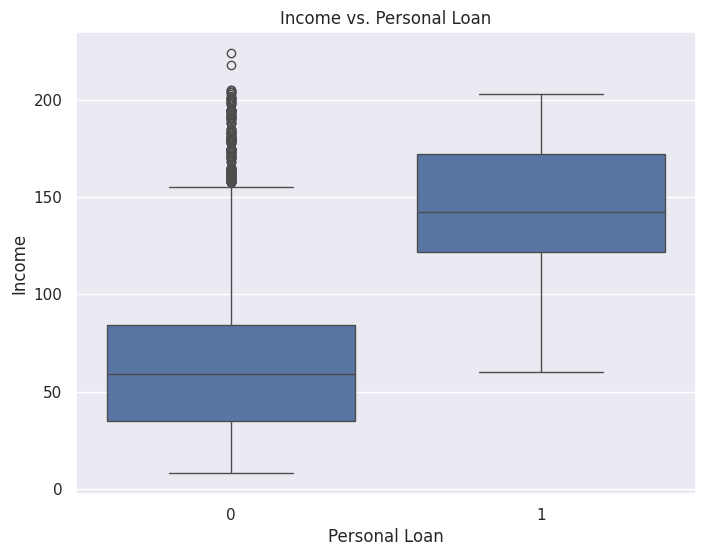

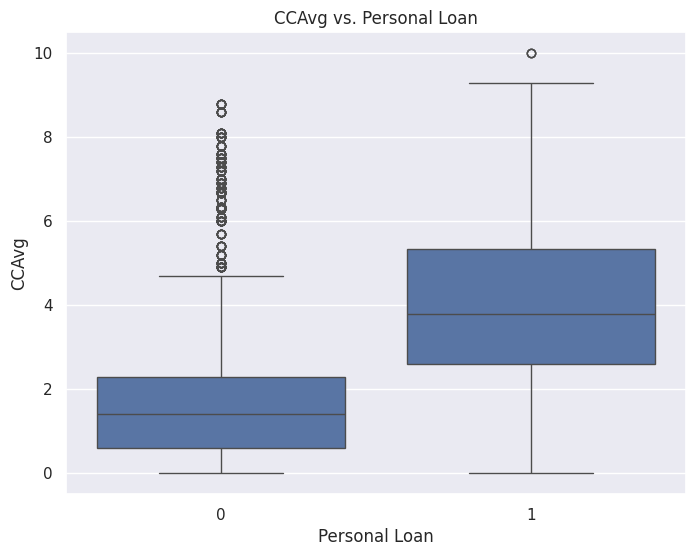

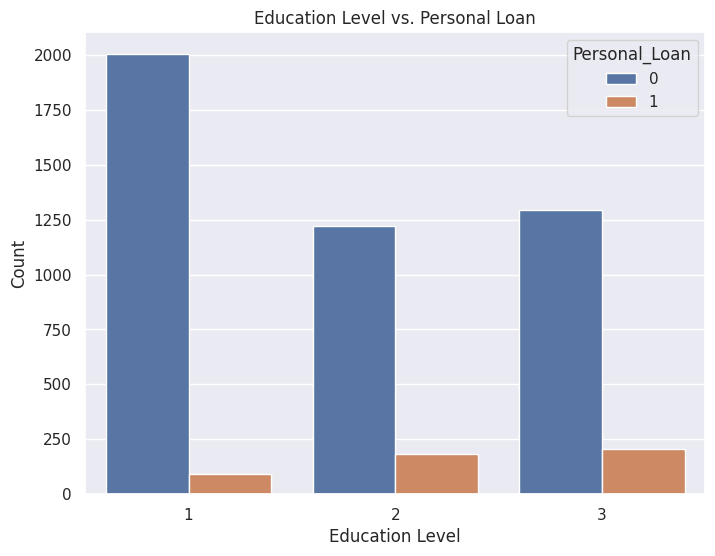

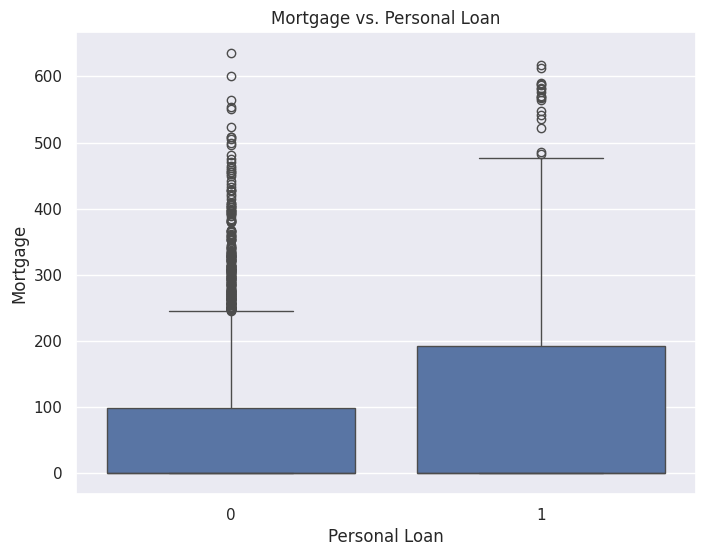

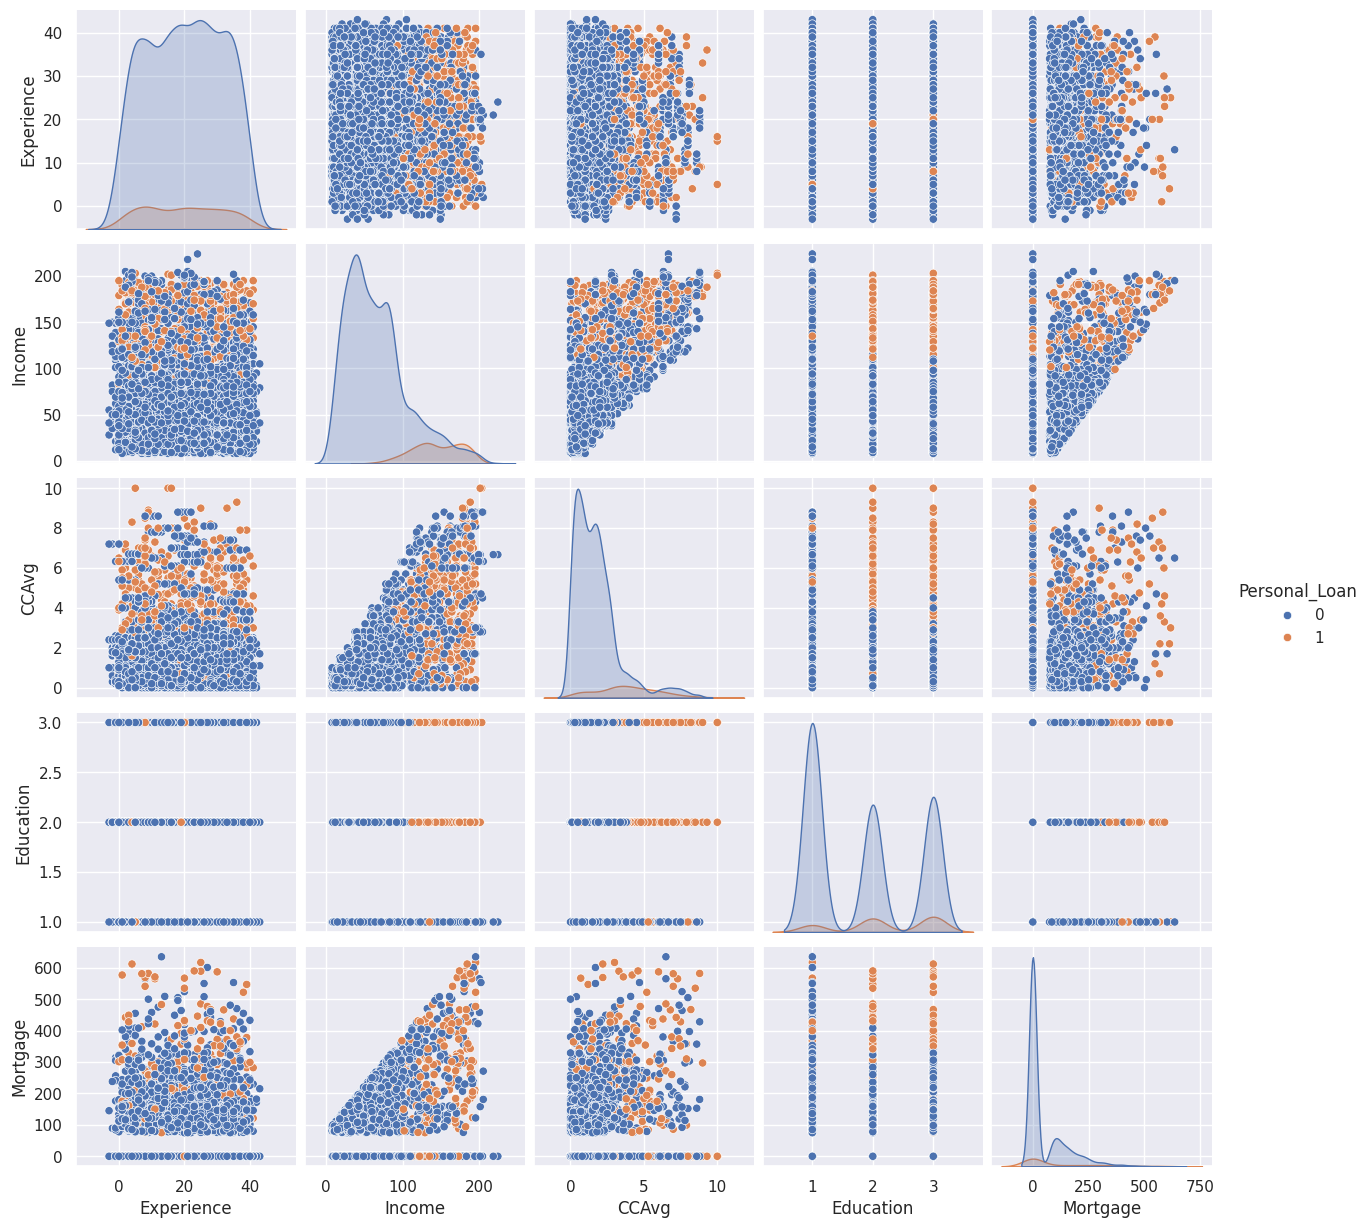

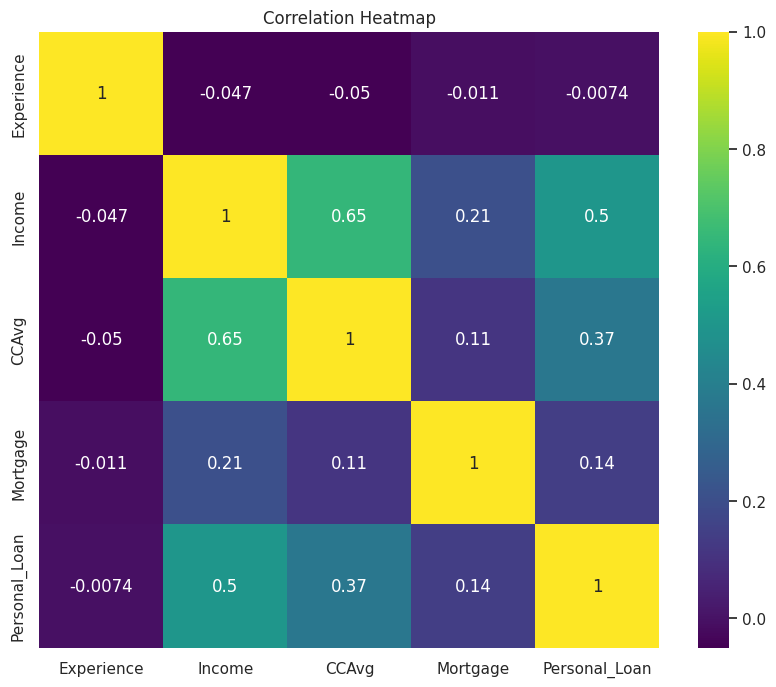

In [14]:
# Creating visualizations to understand the relationship between features and Personal Loan

# Relationship between Income and Personal Loan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Personal_Loan", y="Income")
plt.title("Income vs. Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("Income")
plt.show()

# Relationship between CCAvg and Personal Loan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Personal_Loan", y="CCAvg")
plt.title("CCAvg vs. Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("CCAvg")
plt.show()

# Relationship between Education and Personal Loan
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Education", hue="Personal_Loan")
plt.title("Education Level vs. Personal Loan")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# Relationship between Mortgage and Personal Loan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Personal_Loan', y='Mortgage')
plt.title("Mortgage vs. Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("Mortgage")
plt.show()

# Pairplot to visualize relationships between multiple features
sns.pairplot(df[['Experience','Income', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan']], hue="Personal_Loan")
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df[['Experience','Income','CCAvg','Mortgage','Personal_Loan']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

## Observations :

Here’s a concise summary of the correlation analysis:

- **Experience and Income**: Very weak negative correlation (-0.0466), showing a minimal relationship between experience and income.
- **Experience and Credit Card Spending**: Weak negative correlation (-0.0501), indicating little connection between experience and average credit card spending.
- **Experience and Mortgage**: Extremely low correlation (-0.0106), suggesting no significant relationship.
- **Experience and Personal Loan**: Very weak correlation (-0.0074), almost negligible.
- **Income and Credit Card Spending**: Moderate positive correlation (0.646), indicating higher income is associated with higher credit card spending.
- **Income and Mortgage**: Weak positive correlation (0.2068), implying that as income increases, people may take larger mortgages, though the relationship is weak.
- **Income and Personal Loan**: Moderate positive correlation (0.5025), showing higher-income individuals are more likely to have personal loans.
- **Credit Card Spending and Mortgage**: Very weak positive correlation (0.1099), suggesting no significant relationship.
- **Credit Card Spending and Personal Loan**: Moderate positive correlation (0.3669), indicating those who spend more on credit cards are more likely to have personal loans.
- **Mortgage and Personal Loan**: Weak positive correlation (0.1421), with a weak link between having a mortgage and a personal loan.

Overall, the strongest relationships are between income and credit card spending, income and personal loans, and credit card spending and personal loans.

### Feature Extraction:

In [15]:
# Binning the Experience column into categories

df.loc[df['Experience'] <= 10, 'Experience'] = 0
df.loc[(df['Experience'] > 10) & (df['Experience'] <= 20), 'Experience'] = 1
df.loc[(df['Experience'] > 20) & (df['Experience'] <= 30), 'Experience'] = 2
df.loc[(df['Experience'] > 30) & (df['Experience'] <= 40), 'Experience'] = 3
df.loc[df['Experience'] >= 40, 'Experience'] = 4

<Axes: xlabel='Experience', ylabel='Personal_Loan'>

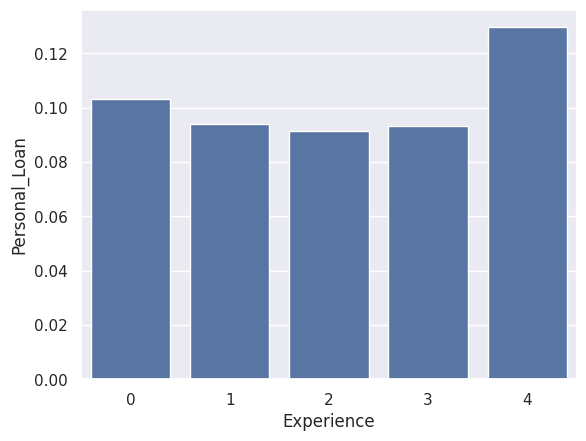

In [16]:
sns.barplot(x='Experience', y='Personal_Loan', ci=None, data=df)

In [17]:
# Binning the Income column into categories

df.loc[df['Income'] <= 10, 'Income'] = 0
df.loc[(df['Income'] > 10) & (df['Income'] <= 100), 'Income'] = 1
df.loc[(df['Income'] > 100) & (df['Income'] <= 150), 'Income'] = 2
df.loc[df['Income'] > 150, 'Income'] = 3

<Axes: xlabel='Income', ylabel='Personal_Loan'>

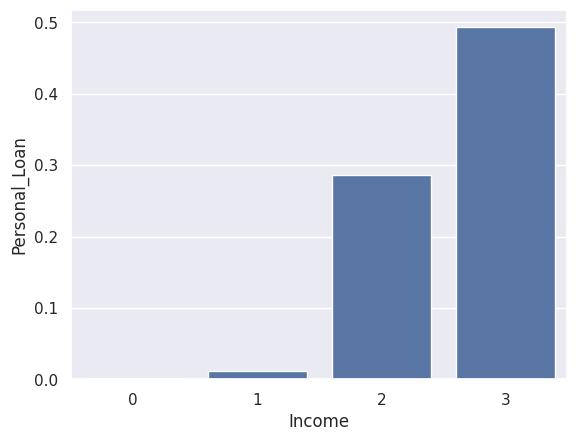

In [18]:
sns.barplot(x='Income', y='Personal_Loan', ci=None, data=df)

In [19]:
# Checking the distribution of numeric values (0, 1, 2, 3) in the 'Income_Binned' column

value_counts = df['Income'].value_counts()

print(value_counts)

Income
1    3716
2     770
3     442
0      72
Name: count, dtype: int64


In [20]:
# deleting/dropping the columns that effect model performance and evaluation

df_red = df.drop(columns = ['ID','Age','ZIPCode'])

In [21]:
df_red.shape

(5000, 11)

## Model Building and checking performnce against different classifiers

In [22]:
# Importing Classifier Modules

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [23]:
# Splitting data into features and target variable

X = df_red.drop('Personal_Loan', axis=1)  # Features
y = df_red['Personal_Loan']

In [24]:
# splitting the data for train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [28]:
# creating decision tree and training it

dftree1 = DecisionTreeClassifier(random_state=42)
dftree1.fit(X_train, y_train)
y_pred_decision_tree = dftree1.predict(X_test)

In [29]:
def model_performance_classification(model, predictors, target):

    #predicting using independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target,pred)
    f1 = f1_score(target, pred)

    ## Creating the dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precisoin": precision, "F1":f1},index = [0])
    return df_perf

In [30]:
def plot_confusion_matrix(model,predictors,target):

    ## predicting the target values using given model and predictors

    y_pred = model.predict(predictors)

    ## creating the confusion matrix
    cm = confusion_matrix(target, y_pred)

    #creating labels in confusion matrix

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # setting the fig_size for plot
    plt.figure(figsize=(5,3))

    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

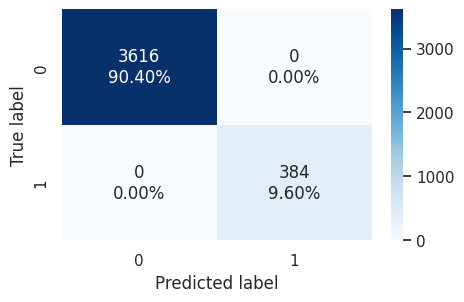

In [31]:
plot_confusion_matrix(dftree1, X_train, y_train)  ## plotting confusion matrix for training set

In [32]:
dftree1_train_perf = model_performance_classification(
    dftree1, X_train, y_train
)
dftree1_train_perf

,Accuracy,Recall,Precisoin,F1
0,1.0,1.0,1.0,1.0


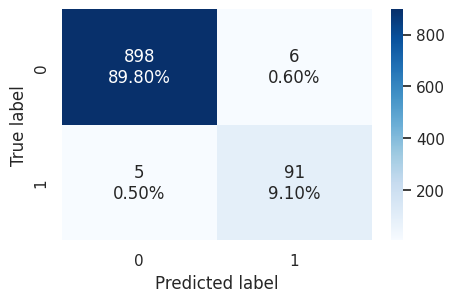

In [33]:
plot_confusion_matrix(dftree1, X_test, y_test)  ## plotting confusion matrix for test set

In [34]:
dftree1_test_perf = model_performance_classification(
    dftree1, X_test, y_test
)
dftree1_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.989,0.947917,0.938144,0.943005


Although the model shows 100% accuracy on the training set and 99% accuracy on the test set, there is a possibility of overfitting. To address this, further analysis can be conducted, including hyperparameter tuning, pre-pruning, and post-pruning, followed by an evaluation of the model's performance.

In [35]:
# pre pruning

max_depth_Values = np.arange(2,12,2)
max_leaf_nodes = np.arange(10,51,10)
min_sample_split = np.arange(10,51,10)

#initializing variables to store best model and performance respectively

best_model = None
best_score = float('inf')

## iterating over all the combinations of the specified parameter values
for max_depth in max_depth_Values:
    for max_leaf in max_leaf_nodes:
        for min_split in min_sample_split:

          #initializing current parameters
          model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf, min_samples_split=min_split, random_state=42)
          model.fit(X_train, y_train)

          #making preditions on the training and testing sets
          y_train_pred = model.predict(X_train)
          y_test_pred = model.predict(X_test)

          #calculating f1 scores for training and testing sets
          f1_train = f1_score(y_train, y_train_pred)
          f1_test = f1_score(y_test, y_test_pred)

          # calculate the absolute difference between training and test F1 scores
          score_diff = abs(f1_train - f1_test)

          # update the best estimator and best score if the current one has a smaller score difference
          if score_diff < best_score:
              best_score = score_diff
              best_model = model

In [36]:
# creating an instance of the best model
dftree2 = best_model

# fitting the best model to the training data
dftree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=30, min_samples_split=10,
                       random_state=42)

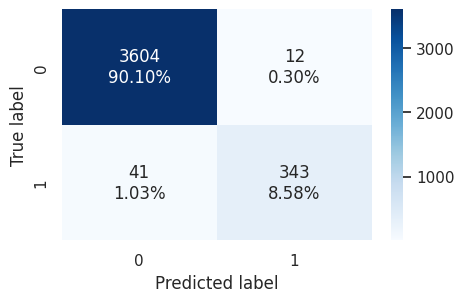

In [37]:
plot_confusion_matrix(dftree2, X_train, y_train)  ## plotting confusion matrix for training set

In [38]:
dftree2_train_perf = model_performance_classification(
    dftree2, X_train, y_train
)
dftree2_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.98675,0.893229,0.966197,0.928281


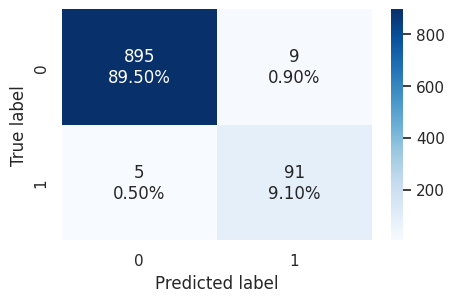

In [39]:
plot_confusion_matrix(dftree2, X_test, y_test)  ## plotting confusion matrix for training set

In [40]:
dftree2_test_perf = model_performance_classification(
    dftree2, X_test, y_test
)
dftree2_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.986,0.947917,0.91,0.928571


In [41]:
# Post pruning

# Creating an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path and total impurities at each alpha along the pruning path

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [42]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04941905181482666


In [43]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [44]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

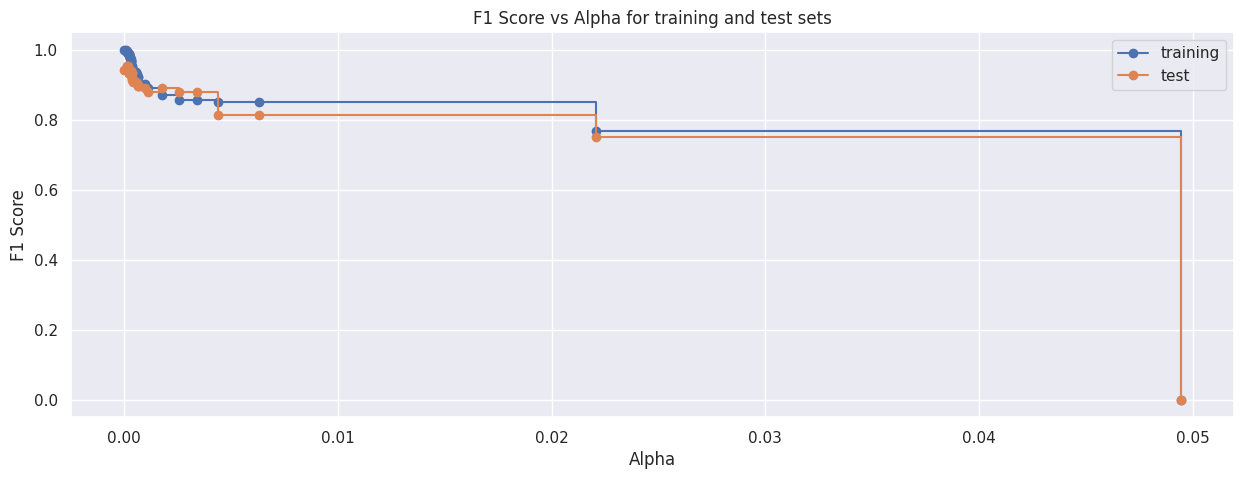

In [61]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [45]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dftree3 = clfs[index_best_model]
print(dftree3)

DecisionTreeClassifier(ccp_alpha=0.00015789473684210535, random_state=42)


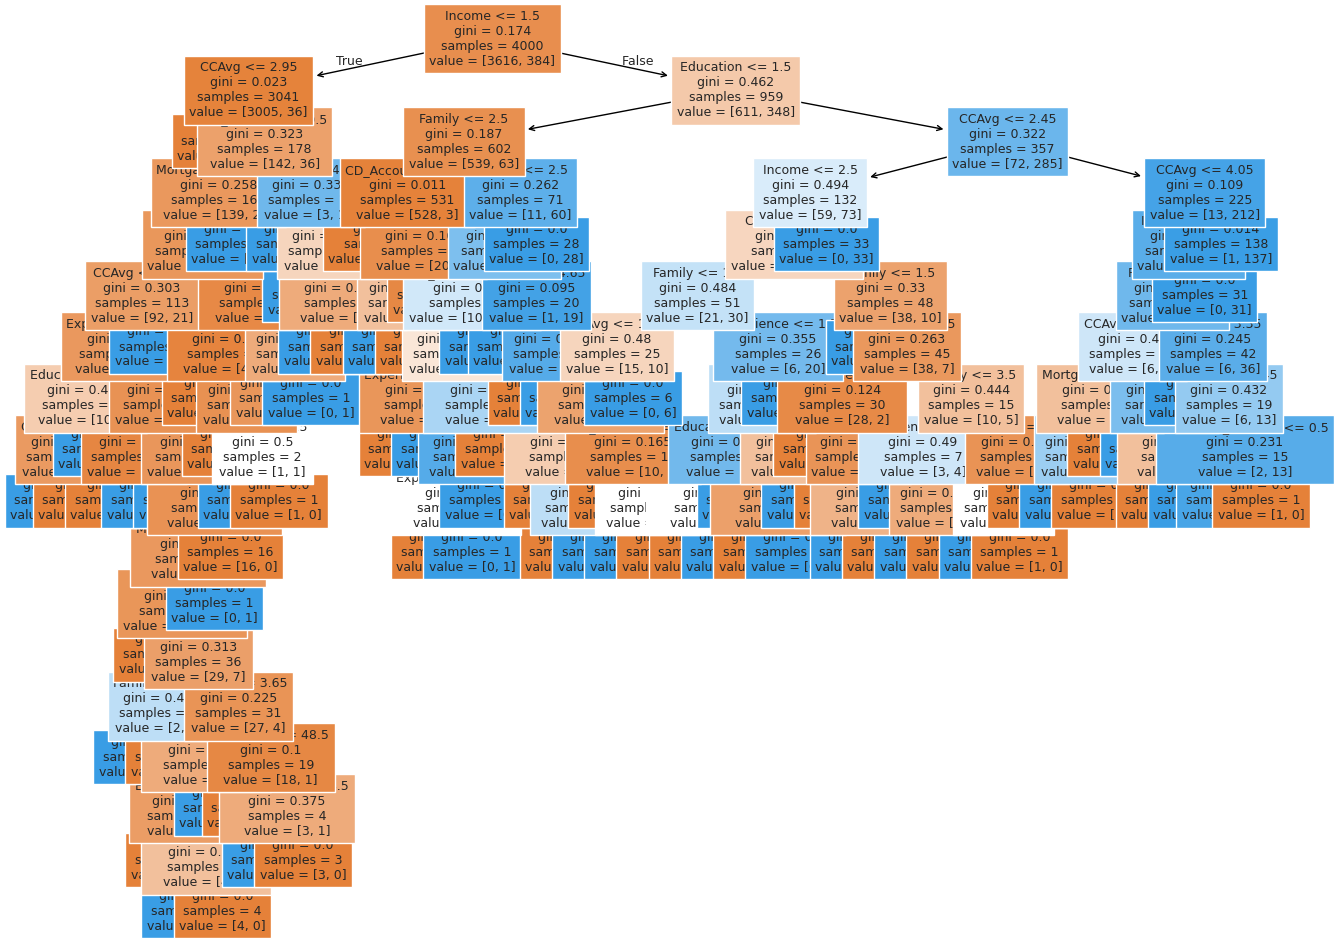

In [65]:
from sklearn import tree #Import the 'tree' module

# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(16, 12))

# plotting the decision tree
out = tree.plot_tree(
    dftree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for i in out:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

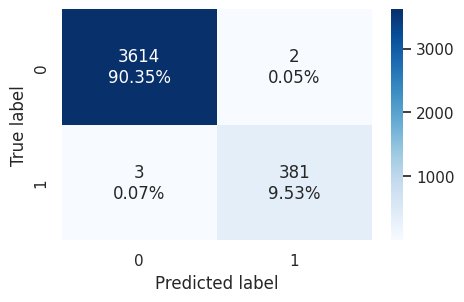

In [46]:
plot_confusion_matrix(dftree3, X_train, y_train)  ## plotting confusion matrix for training set

In [47]:
dftree3_train_perf = model_performance_classification(
    dftree3, X_train, y_train
)
dftree3_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.99875,0.992188,0.994778,0.993481


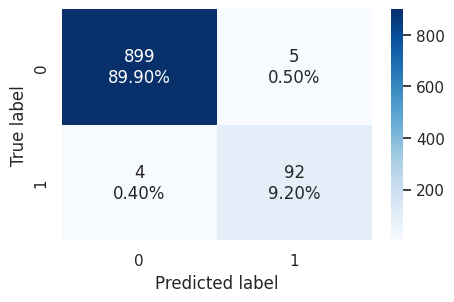

In [48]:
plot_confusion_matrix(dftree3, X_test, y_test)  ## plotting confusion matrix for training set

In [50]:
dftree3_test_perf = model_performance_classification(
    dftree3, X_test, y_test
)
dftree3_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.991,0.958333,0.948454,0.953368


In [51]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dftree1_train_perf.T,
        dftree2_train_perf.T,
        dftree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.986750,0.998750
Recall,1.0,0.893229,0.992188
Precisoin,1.0,0.966197,0.994778
F1,1.0,0.928281,0.993481


In [52]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dftree1_test_perf.T,
        dftree2_test_perf.T,
        dftree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.989000,0.986000,0.991000
Recall,0.947917,0.947917,0.958333
Precisoin,0.938144,0.910000,0.948454
F1,0.943005,0.928571,0.953368


In [66]:
%%time
# choosing a data point
Personal_Loan = X_test.iloc[:2, :]

# making a prediction
Loan_prediction = dftree3.predict(Personal_Loan)

print(Loan_prediction)

[0 1]
CPU times: user 5.46 ms, sys: 28 µs, total: 5.49 ms
Wall time: 9.13 ms


## Observations:

### Summary of Model Performance:

1. **Accuracy**:
   - The **Post-Pruning Decision Tree** consistently performs the best, with an accuracy of 99.88%, higher than both the default and pre-pruned models.
   - The **Default Decision Tree** achieves 100% accuracy in one comparison, but this suggests potential overfitting.

2. **Recall**:
   - **Post-Pruning** significantly improves recall, reaching 99.22% in both comparisons, while the **Default** tree has a perfect recall in the second comparison but likely overfits.
   - **Pre-Pruning** reduces recall significantly, especially in the second comparison (89.32%).

3. **Precision**:
   - The **Post-Pruning Decision Tree** maintains high precision (99.48%) without sacrificing recall.
   - The **Default Decision Tree** achieves perfect precision (100%), but this might come at the cost of reduced recall, indicating overfitting.
   - **Pre-Pruning** slightly reduces precision but helps avoid overfitting.

4. **F1-Score**:
   - **Post-Pruning** offers the best F1-score (99.35%), reflecting a balanced model with both high precision and recall.
   - **Default Decision Tree** has a perfect F1-score in one comparison, but overfitting is likely.
   - **Pre-Pruning** shows a notable reduction in F1-score, indicating a trade-off for avoiding overfitting.

### Conclusion:
The **Post-Pruning Decision Tree** is the best overall model, offering a strong balance between accuracy, recall, precision, and F1-score. It avoids overfitting while maintaining good performance across all metrics.

Text(0.5, 0, 'Relative Importance')

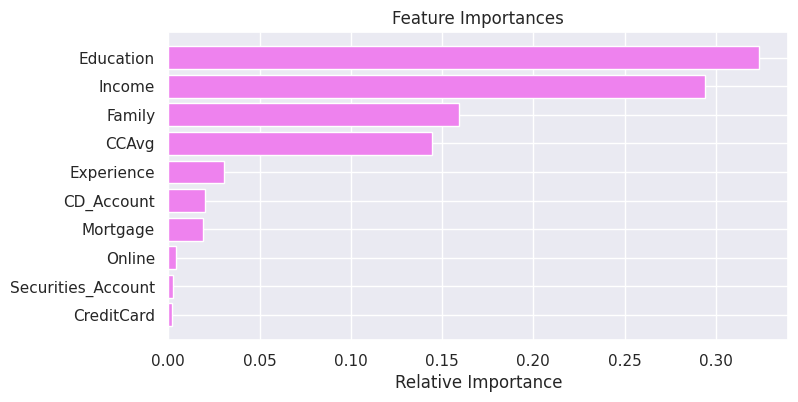

In [53]:
# importance of features in the tree building
# list of feature names in X_train
feature_names = list(X_train.columns)
importances = dftree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")

In [54]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 94.6%


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

Train Accuracy: 96.38%


In [59]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Accuracy: ", cv_scores.mean())


Cross-Validation Accuracy:  0.9395


## Observations:

 while both K-Nearest Neighbors (KNN) and Decision Trees demonstrate similar performance levels, we opt for Decision Trees as the final model due to several key advantages:

#### Lower Computational Complexity:
Decision Trees are generally more efficient than KNN, especially with large datasets, as they do not require distance calculations for each instance.
#### Enhanced Interpretability:
Decision Trees offer a clear visual representation of decision-making processes, which aids stakeholders in understanding the model's predictions.
#### Effective Feature Interaction Handling:
Decision Trees can naturally capture interactions between features without extensive preprocessing, unlike KNN, which is more reliant on the data's local structure.
#### Greater Robustness to Noise:
Decision Trees are less sensitive to outliers and irrelevant features, making them more resilient in noisy data environments.


## Reccomendations:

#### Focus on High-Probability Customers:
Prioritize the top 10-15% of customers with the highest likelihood of purchasing a loan. This will optimize campaign efficiency and improve conversion rate.

#### Utilize Key Customer Attributes:
Tailor marketing messages and offers based on key customer attributes (such as income, credit score, and deposit size). Customize campaigns to different segments according to these characterisics.

#### Segment and Personalize Messaging:
Develop targeted campaigns for customers with varying probabilities of loan urchase

High-probability:
Highlight loan advantages like low inteest rates.

Medium-probability:
Provide educational content and address potential concerns such as loa eligibility.

Low-probability:
Offer nurturing content, such as financial advice, to build a relatinship over time.

#### Improve Recall (Minimize Missed Opportunities):
Slightly expand the target audience to include more customers who may be overlooked by the model, thus enhancing recall and bosting conversions.

#### Experiment with Campaign Channels:
Test different marketing channels (e.g., email, SMS, mobile apps, in-branch promotions) to determine which works best for each customer segment. Use A/B testing to continuosly refine strategies.

#### Monitor and Optimize Campaigns:
Continuously track and evaluate campaign performance. Adjust strategies based on real-time data and customerfeedback to maximize ROI.

#### Leverage Cross-Sell Opportunities:
Identify and promote related products like credit cards or insurance, particularly to customers who are converting to loan buyers, to increase oveall customer lifetime value.

#### Conclusion:
Target high-probability customers through personalized, segmented campaigns across various channels. Continuously optimize campaign strategies and leverage cross-sell opportunities to maximize # value and improve performance.

## Thank You!